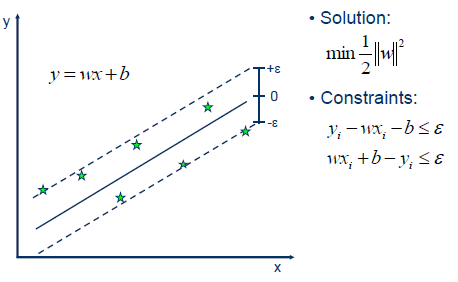

In [21]:
from IPython.display import Image
Image('/home/adish/Downloads/SVR_11.png')

Support Vector Machine can also be used as a regression method, maintaining all the main features that characterize the algorithm (maximal margin). The Support Vector Regression (SVR) uses the same principles as the SVM for classification, with only a few minor differences. First of all, because output is a real number it becomes very difficult to predict the information at hand, which has infinite possibilities. In the case of regression, a margin of tolerance (epsilon) is set in approximation to the SVM which would have already requested from the problem. But besides this fact, there is also a more complicated reason, the algorithm is more complicated therefore to be taken in consideration. However, the main idea is always the same: to minimize error, individualizing the hyperplane which maximizes the margin, keeping in mind that part of the error is tolerated. 

As a supervised-learning approach, SVR trains using a symmetrical loss function, which equally penalizes high and low misestimates.A flexible tube of minimal radius is formed symmetrically around the estimated function, such that the absolute values of errors less than a certain threshold are ignored both above and below the estimate. In this manner, points outside the tube are penalized, but those within the tube, either above or below the function, receive no penalty. One of the main advantages of SVR is that its computational complexity does not depend on the dimensionality of the input space. Additionally, it has excellent generalization capability, with high prediction accuracy.

SVM generalization to SVR is accomplished by introducing an ε-insensitive region around the function, called the ε-tube. This tube reformulates the optimization problem to find the tube that best approximates the continuous-valued function, while balancing model complexity and prediction error. More specifically, SVR is formulated as an optimization problem by first defining a convex ε-insensitive loss function to be minimized and finding the flattest tube that contains most of the training instances. Hence, a multiobjective function is constructed from the loss function and the geometrical properties of the tube.The hyperplane is represented in terms of support vectors, which are training samples that lie outside the boundary of the tube. As in SVM, the support vectors in SVR are the most influential instances that affect the shape of the tube, and the training and test data are assumed to be independent and identically distributed (iid), drawn from the same fixed but unknown probability distribution function in a supervised-learning context.

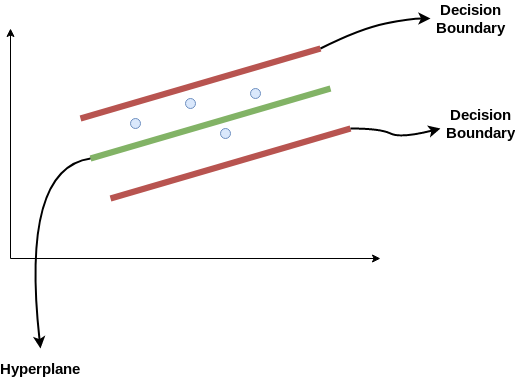

In [20]:
from IPython.display import Image
Image('/home/adish/Downloads/SVR1.jpeg')

- these two red lines are the decision boundary and the green line is the hyperplane. Our objective, when we are moving on with SVR, is to basically consider the points that are within the decision boundary line. Our best fit line is the hyperplane that has a maximum number of points.

- the decision boundary (the danger red line above!). Consider these lines as being at any distance, say ‘a’, from the hyperplane. So, these are the lines that we draw at distance ‘+a’ and ‘-a’ from the hyperplane.[a-epsilon]

#### Assuming that the equation of the hyperplane is as follows:

- Y = wx+b (equation of hyperplane)
- Then the equations of decision boundary become:

- wx+b= +a

- wx+b= -a

- Thus, any hyperplane that satisfies our SVR should satisfy:

- -a < Y- wx+b < +a 

Our main aim here is to decide a decision boundary at ‘a’ distance from the original hyperplane such that data points closest to the hyperplane or the support vectors are within that boundary line.

Hence, we are going to take only those points that are within the decision boundary and have the least error rate, or are within the Margin of Tolerance. This gives us a better fitting model.

### NOTE:
In this scenario,we have to apply feature scaling bcoz there is no explicit equation of dependent variable w.r.t the features 
i.e there are no coefficients multiplying each of the features... y=m1x1+m2x2+..mnxn
and therefore not compensating the lower values for the features taking higher values.
- SVR does not have this kind of explicit equations,it has an implicit equation of dependent variables wrt equation.we therefore have to apply feature scaling.

- we dont have to apply feature scaling for models like linear reg.,multilinear reg. , where we have the coefficients that can compensate with the high values of the feature

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('/home/adish/Desktop/Position_Salaries.csv')
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [4]:
y#1D, have to convert it into 2D , bcoz standardscaler expects a 2D array as input

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [5]:
y.shape#1d

(10,)

In [6]:
y = y.reshape(len(y),1)
y.shape

(10, 1)

In [7]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

## feature scaling 

- here we have to apply feature scaling bcoz we dont want the "level" feature , which takes a value, much lower than that of the dependent variable to be neglected by the SVR model

- dont apply feature scaling to 1)the dummy variable(resulting from one hot encoding) 2) dependent variable taking binary values(0 and 1)

- apply feature scaling when dependent variable take very HIGH VALUE compared to features(independent variables)

#### In this case we do not apply the same standard scalar to both dependent (salary) and independent (level) bcoz when we are fitting standard scalar on the data,it is goin to compute the mean and standard deviation of that same variable.

#### hence we dont have the same mean and standard deviation for level and salary , so we have to create 2 standard scalar objects .(one for level ,one for salary).

In [8]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)
x

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [9]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [10]:
from sklearn.svm import SVR
reg = SVR(kernel = 'rbf')
reg.fit(x, y)

/home/adish/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [16]:
#apply reverse scaling
sc_y.inverse_transform(reg.predict(sc_x.transform([[6.5]])))


array([170370.0204065])

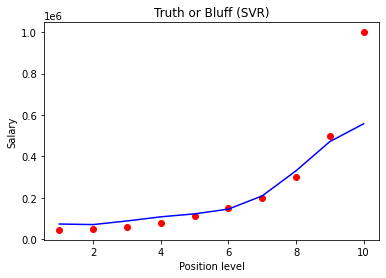

In [18]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(reg.predict(x)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()